<h2 align="center">Room Occupancy Detection Using Sensor Data</h2>

<img src="model-selection-triple.jpg" width="560" height="480"></img>

### Task 1: Introduction and Importing Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import yellowbrick as yb

warnings.simplefilter('ignore')

### Task 2: Anscombe's Quartet

***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [2]:
#data
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])


In [3]:
# verify the summary statistics
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


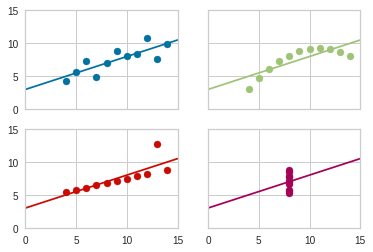

In [4]:
#visualize
g = yb.anscombe()
plt.show()

<h2 align=center> Feature Analysis </h2>

Components:
1. `Define` a bounded, high dimensional feature space that can be effectively modeled.
2. `Transform` and manipulate the space to make modeling eaier.
3. `Extract` a feature representation of each instance in the space.

### Task 3: Load the Classification Data
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [5]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')
data.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
# Specify the features of interest
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

In [7]:
# Extract the instances and target
X = data[features]
y = data.occupancy

### Task 4: Feature Analysis - Scatter Plot
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

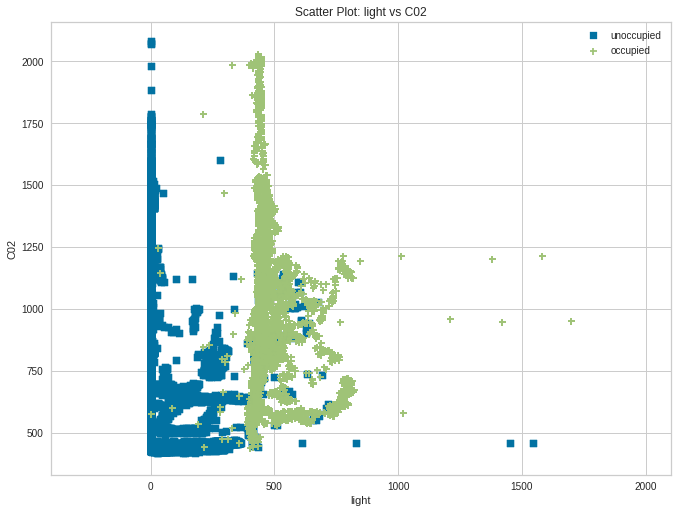

In [8]:
from yellowbrick.contrib.scatter import ScatterVisualizer

visualizer = ScatterVisualizer(x="light", y="C02", classes=classes, size=(800, 600))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()


### Task 5: Feature Analysis - RadViz
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [16]:
from yellowbrick.features.radviz import RadViz

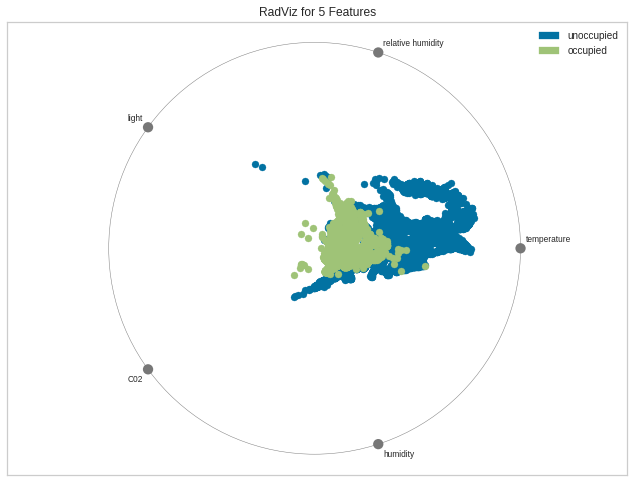

In [17]:
# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features, size=(800, 600))

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

### Task 6: Feature Analysis - Parallel Coordinates Plot
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [10]:
# Instantiate the visualizer


# Fit the data to the visualizer


# Transform the data


# Draw/show/poof the data

### Task 7: Feature Analysis - Rank Features
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [11]:
# Instantiate the visualizer with the Covariance ranking algorithm


In [12]:
# Instantiate the visualizer with the Pearson ranking algorithm


### Task 8: Feature Analysis - Manifold Visualization
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

<h2 align=center> Model Selection and Evaluation </h2>

1. Choose a `model family` that best captures the relationship between the variables of interest.
2. Define a `model form` that specifies exactly how features interact to make a prediction.
3. Train a `fitted model` by optimizing internal parameters to the data.

### Task 9: ROC/AUC Plots
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [13]:
# Create the train and test data


In [14]:

# Instantiate the classification model and visualizer

# Fit the training data to the visualizer

# Evaluate the model on the test data

# Draw/show/poof the data


### Task 10: Classification Report and Confusion Matrix
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

### Task 11: Cross Validation Scores
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [15]:
# Create a new figure and axes

# Create a cross-validation strategy

# Create the CV score visualizer


### Task 12: Evaluating Class Balance
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

### Task 13: Discrimination Threshold for Logistic Regression
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***